In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [7]:
# Load the dataset
iris = load_iris()
print(iris.feature_names)
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
data['target'] = iris.target  # 0: setosa, 1: versicolor, 2: virginica

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [9]:
# Basic stats
print(data.describe())
print(data['target'].value_counts())

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  
target
0    50
1    50
2    50
Name: count, dtype: int64


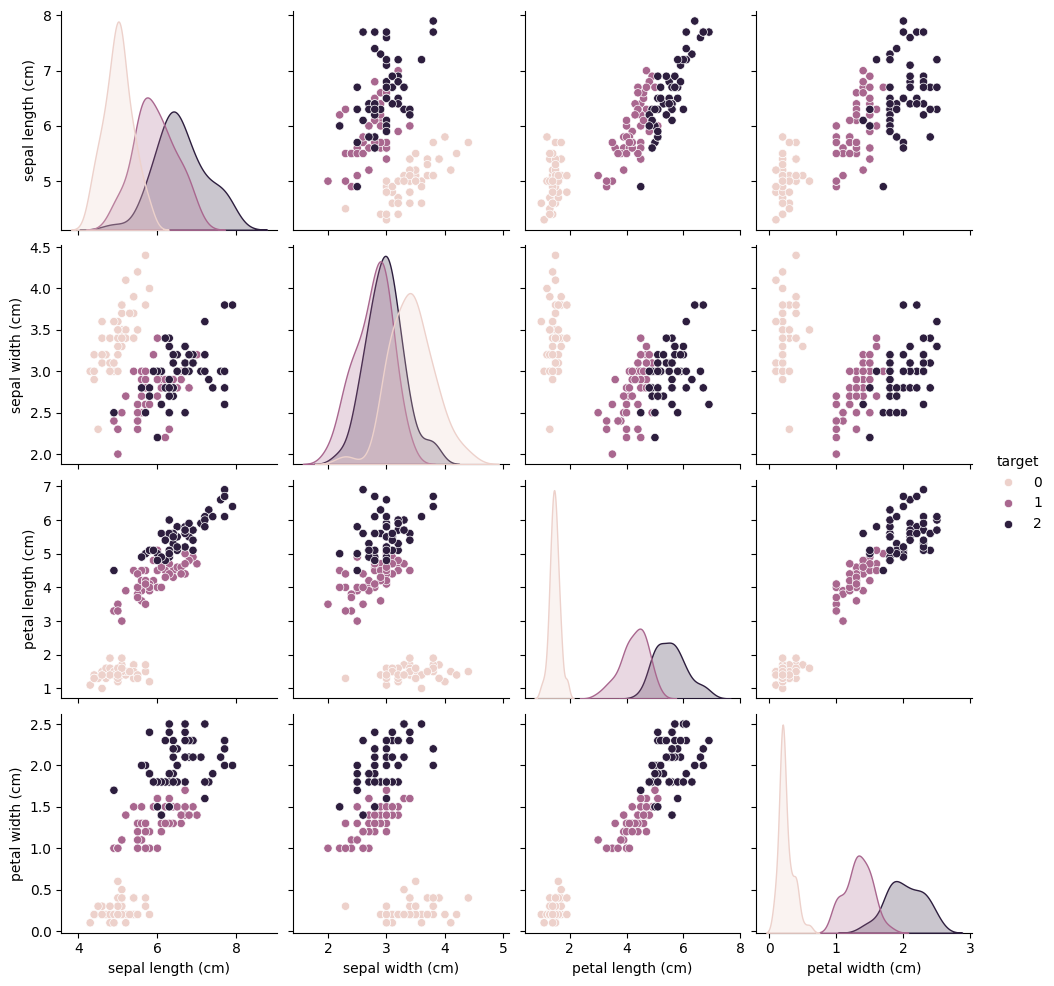

In [10]:
# Visualize: Pairplot for feature relationships
import seaborn as sns  # Bonus: pip install seaborn if you want fancier plots
sns.pairplot(data, hue='target')
plt.show()

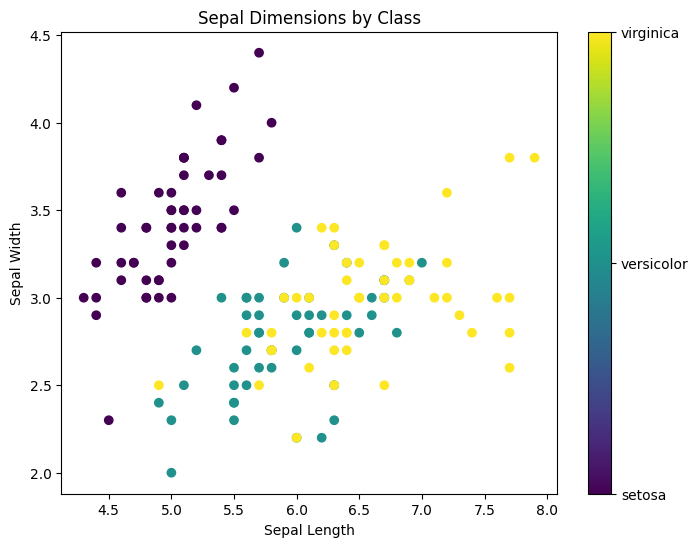

In [11]:
# Alternative with Matplotlib: Scatter plot example
plt.figure(figsize=(8,6))
plt.scatter(data['sepal length (cm)'], data['sepal width (cm)'], c=data['target'], cmap='viridis')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Sepal Dimensions by Class')
plt.colorbar(ticks=[0,1,2], format=plt.FuncFormatter(lambda val, loc: iris.target_names[val]))
plt.show()

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split data
X = data.drop('target', axis=1)  # Features
y = data['target']  # Labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # 80/20 split, reproducible

# Scale features (mean=0, std=1)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training samples: {len(X_train)}, Test samples: {len(X_test)}")

Training samples: 120, Test samples: 30


In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Model 1: Logistic Regression
log_reg = LogisticRegression(max_iter=200)  # Increase iter if convergence warning
log_reg.fit(X_train_scaled, y_train)

# Model 2: Decision Tree
tree_clf = DecisionTreeClassifier(max_depth=3, random_state=42)  # Limit depth to avoid overfitting
tree_clf.fit(X_train_scaled, y_train)  # Trees don't need scaling, but consistency is good

DecisionTreeClassifier(max_depth=3, random_state=42)

In [14]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score

# Predictions
log_pred = log_reg.predict(X_test_scaled)
tree_pred = tree_clf.predict(X_test_scaled)

In [15]:
# Accuracy
print(f"Logistic Regression Accuracy: {accuracy_score(y_test, log_pred):.2f}")
print(f"Decision Tree Accuracy: {accuracy_score(y_test, tree_pred):.2f}")

Logistic Regression Accuracy: 1.00
Decision Tree Accuracy: 1.00


In [16]:
# Confusion Matrix (example for Logistic)
cm = confusion_matrix(y_test, log_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [17]:
# Cross-validation (robust eval)
log_cv = cross_val_score(log_reg, X, y, cv=5)  # 5-fold on full data
print(f"Logistic CV Mean Accuracy: {log_cv.mean():.2f}")

Logistic CV Mean Accuracy: 0.97


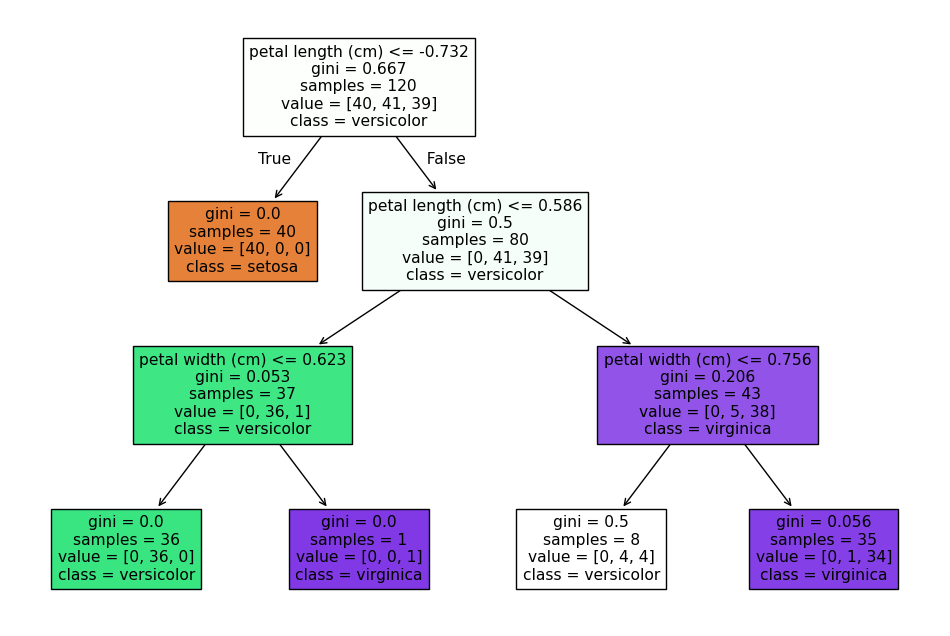

In [18]:
# Bonus: Plot Decision Tree (if you want visual)
from sklearn.tree import plot_tree
plt.figure(figsize=(12,8))
plot_tree(tree_clf, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.show()

In [19]:
from sklearn.model_selection import GridSearchCV

# Tune Decision Tree
param_grid = {'max_depth': [2,3,4,5], 'min_samples_split': [2,5,10]}
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)
print(f"Best Params: {grid_search.best_params_}")
best_tree = grid_search.best_estimator_

Best Params: {'max_depth': 4, 'min_samples_split': 2}
